<a href="https://colab.research.google.com/github/PRaliphada/ExpectedLoss/blob/main/Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Your NewsAPI key
newsapi_key = '6dc23737eb7144c5b3d46c55ed9e6f1b'

# Financial entities related to U.S. Treasury bonds
entities = ['U.S. Treasury Bonds', 'U.S. Treasury', 'Treasury Bonds']

# Set up VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function to get news articles
def get_news(entity, api_key, num_articles=10000):
    url = f'https://newsapi.org/v2/everything?q={entity}&apiKey={api_key}&language=en&pageSize={num_articles}'
    response = requests.get(url)
    data = response.json()

    news_data = []
    if data['status'] == 'ok':
        articles = data['articles']
        for article in articles:
            news_content = article['description'] if article['description'] else article['content']
            sentiment = get_sentiment(news_content)
            news_data.append([article['source']['name'], entity, sentiment, news_content])

    return news_data

# Store all news data
all_news = []

for entity in entities:
    all_news.extend(get_news(entity, newsapi_key))

# Create a DataFrame
df = pd.DataFrame(all_news, columns=['Source', 'Entity', 'Sentiment', 'News Content'])

# Save to CSV
df.to_csv('financial_news_bonds_sentiment.csv', index=False)

print(df.head())


Empty DataFrame
Columns: [Source, Entity, Sentiment, News Content]
Index: []


In [ ]:
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Your NewsAPI key
newsapi_key = '6dc23737eb7144c5b3d46c55ed9e6f1b'

# Broader financial queries related to U.S. Treasury bonds
queries = ['U.S. Treasury', 'Treasury Bonds', 'Bond Market', 'Government Bonds']

# Set up VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function to get news articles
def get_news(query, api_key, num_articles=100):
    url = f'https://newsapi.org/v2/everything?q={query}&apiKey={api_key}&language=en&pageSize={num_articles}'
    response = requests.get(url)
    data = response.json()

    if data['status'] != 'ok':
        print(f"Error fetching data for query '{query}': {data.get('message')}")
        return []

    news_data = []
    articles = data.get('articles', [])
    for article in articles:
        news_content = article['description'] if article['description'] else article['content']
        sentiment = get_sentiment(news_content)
        news_data.append([article['source']['name'], query, sentiment, news_content])

    return news_data

# Store all news data
all_news = []

for query in queries:
    all_news.extend(get_news(query, newsapi_key))

# Check if any news was retrieved
if not all_news:
    print("No news articles were retrieved. Try broadening your queries or checking the API key.")
else:
    # Create a DataFrame
    df = pd.DataFrame(all_news, columns=['Source', 'Entity', 'Sentiment', 'News Content'])

    # Save to CSV
    df.to_csv('financial_news_bonds_sentiment.csv', index=False)

    # Print the first few rows
    print(df)



                  Source            Entity Sentiment  \
0            Gizmodo.com     U.S. Treasury  Negative   
1            Gizmodo.com     U.S. Treasury   Neutral   
2    Yahoo Entertainment     U.S. Treasury  Positive   
3           Slashdot.org     U.S. Treasury  Negative   
4    Yahoo Entertainment     U.S. Treasury   Neutral   
..                   ...               ...       ...   
395               Forbes  Government Bonds  Positive   
396               Forbes  Government Bonds   Neutral   
397               Forbes  Government Bonds  Positive   
398               Forbes  Government Bonds  Positive   
399               Forbes  Government Bonds  Negative   

                                          News Content  
0    Fallout from the indictments continue as YouTu...  
1    Tenet Media said it was a home for heterodox t...  
2    Asian stocks were mixed Monday after U.S. stoc...  
3    Reuters reports that the Iranian hacking team ...  
4    Wall Street stocks are back just shy 

In [ ]:
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

# Your NewsAPI key
newsapi_key = '6dc23737eb7144c5b3d46c55ed9e6f1b'

# Broader financial queries related to U.S. Treasury bonds
queries = ['U.S. Treasury', 'Treasury Bonds', 'Bond Market', 'Government Bonds']

# Set up VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function to get news articles with date range
def get_news(query, api_key, start_date, end_date, num_articles=100):
    url = f'https://newsapi.org/v2/everything?q={query}&from={start_date}&to={end_date}&apiKey={api_key}&language=en&pageSize={num_articles}'
    response = requests.get(url)
    data = response.json()

    if data['status'] != 'ok':
        print(f"Error fetching data for query '{query}': {data.get('message')}")
        return []

    news_data = []
    articles = data.get('articles', [])
    for article in articles:
        news_content = article['description'] if article['description'] else article['content']
        sentiment = get_sentiment(news_content)
        news_data.append([article['source']['name'], query, sentiment, news_content])

    return news_data

# Define your date range
start_date = '2024-08-09'
end_date = '2024-08-08'

# Store all news data
all_news = []

for query in queries:
    all_news.extend(get_news(query, newsapi_key, start_date, end_date))

# Check if any news was retrieved
if not all_news:
    print("No news articles were retrieved. Try broadening your queries or checking the API key.")
else:
    # Create a DataFrame
    df = pd.DataFrame(all_news, columns=['Source', 'Entity', 'Sentiment', 'News Content'])

    # Split the data into training and validation sets
    train, validation = train_test_split(df, test_size=0.2, random_state=42)

    # Save to CSV
    train.to_csv('financial_news_bonds_sentiment_train.csv', index=False)
    validation.to_csv('financial_news_bonds_sentiment_val.csv', index=False)

    # Print the first few rows of the training and validation sets
    print("Training Set:")
    print(train.head())

    print("\nValidation Set:")
    print(validation.head())


Training Set:
                  Source            Entity Sentiment  \
342    Economictimes.com  Government Bonds  Positive   
202  Yahoo Entertainment       Bond Market  Positive   
75        ETF Daily News     U.S. Treasury  Positive   
84       Coinjournal.net     U.S. Treasury  Positive   
355      Lewrockwell.com  Government Bonds  Positive   

                                          News Content  
342  For mutual fund investors, an unchanged repo r...  
202  Asian shares are ending a rough week on a high...  
75   Harbor Capital Advisors Inc. lessened its hold...  
84   Franklin Templeton has launched its US governm...  
355  I love women. My head still turns whenever a g...  

Validation Set:
                  Source            Entity Sentiment  \
193             Livemint       Bond Market  Negative   
33                Reason     U.S. Treasury  Negative   
15   Yahoo Entertainment     U.S. Treasury  Positive   
311  Yahoo Entertainment  Government Bonds  Positive   
57        

In [ ]:
train = train.dropna(subset=['News Content'])

display(train.isnull().sum())
print("*****"* 5)
display(validation.isnull().sum())

,0
Source,0
Entity,0
Sentiment,0
News Content,0


*************************


,0
Source,0
Entity,0
Sentiment,0
News Content,0


In [ ]:
duplicates = train[train.duplicated(subset=['Entity', 'Sentiment', 'News Content'], keep=False)]
train = train.drop_duplicates(subset=['Entity', 'Sentiment', 'News Content'], keep='first')

duplicates = validation[validation.duplicated(subset=['Entity', 'Sentiment', 'News Content'], keep=False)]
validation = validation.drop_duplicates(subset=['Entity', 'Sentiment', 'News Content'], keep='first')

In [ ]:
# Assuming 'train' and 'validation' are your DataFrames

# Calculate sentiment counts for train and validation data
sentiment_counts_train = train['Sentiment'].value_counts()
sentiment_counts_validation = validation['Sentiment'].value_counts()

# Combine counts into a single DataFrame
combined_counts = pd.concat([sentiment_counts_train, sentiment_counts_validation], axis=1)

# Fill missing values (if any) with 0
combined_counts.fillna(0, inplace=True)

# Rename columns
combined_counts.columns = ['Test Data', 'Validation Data']  # Set desired column names

combined_counts

,Test Data,Validation Data
Sentiment,,
Positive,160,40
Negative,88,20
Neutral,35,14


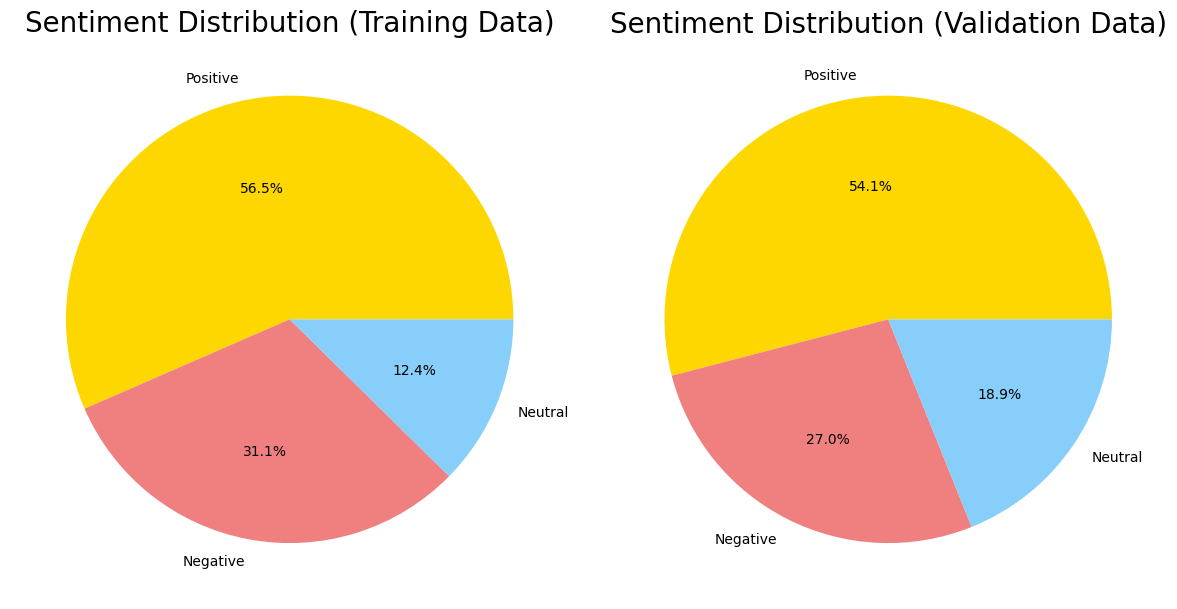

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'train' and 'validation' are your DataFrames

# Calculate sentiment counts
sentiment_counts_train = train['Sentiment'].value_counts()
sentiment_counts_validation = validation['Sentiment'].value_counts()

# Create subplots for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize for better view

# Create pie chart for training data
ax1.pie(sentiment_counts_train, labels=sentiment_counts_train.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue','#99FF99'])
ax1.set_title('Sentiment Distribution (Training Data)', fontsize=20)

# Create pie chart for validation data
ax2.pie(sentiment_counts_validation, labels=sentiment_counts_validation.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue','#99FF99'])
ax2.set_title('Sentiment Distribution (Validation Data)', fontsize=20)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the value counts of 'Entity'
entity_counts = train['Entity'].value_counts()

# Get the top 9 names
top_names = entity_counts.head(19)

# Aggregate the tenth name as 'Other'
other_count = entity_counts[19:].sum()
top_names['Other'] = other_count

# Display the top 19 names and 'Other'
top_names.to_frame()

,count
Entity,
Bond Market,80
Government Bonds,77
U.S. Treasury,69
Treasury Bonds,57
Other,0


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Calculate the percentages
percentages = (top_names / top_names.sum()) * 100

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=percentages.index,
    values=percentages,
    textinfo='label+percent',
    insidetextorientation='radial'
)])


# Update layout
fig.update_layout(
    title_text='Top Names with Percentages',
    showlegend=False
)

# Show the plot
fig.show()

In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you've already run the data preprocessing steps
data = train[['News Content', 'Sentiment']]

# Set your model output as categorical and save in new label col
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])

# Transform your output to numeric
data['Sentiment'] = data['Sentiment_label'].cat.codes

# Use the entire training data as data_train
data_train = data

# Use validation data as data_test
data_test = validation[['News Content', 'Sentiment']]
data_test['Sentiment_label'] = pd.Categorical(data_test['Sentiment'])
data_test['Sentiment'] = data_test['Sentiment_label'].cat.codes

# Create a colorful table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data_train.columns),
        fill_color='paleturquoise',
        align='left',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[data_train[k].tolist()[:10] for k in data_train.columns],
        fill_color=[
            'lightcyan',  # News Content
            ['lightgreen' if s == 'Positive' else 'lightpink' if s == 'Negative'
              else 'lightyellow' if s == 'Neutral' else 'lightgray' for s in data_train['Sentiment_label'][:10]],  # Sentiment
            ['lightgreen' if s == 'Positive' else 'lightpink' if s == 'Negative'
              else 'lightyellow' if s == 'Neutral' else 'lightgray' for s in data_train['Sentiment_label'][:10]],  # Sentiment_label
            'lavender'  # Sentiment (numeric)
        ],
        align='left',
        font=dict(color='black', size=11)
    ))
])

# Update the layout
fig.update_layout(
    title='First 10 Rows of Training Data',
    width=1000,
    height=500,
)

fig.show()


<ipython-input-20-086cddd329a0>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-086cddd329a0>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-086cddd329a0>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-086cd

In [ ]:
import plotly.graph_objects as go

# Create a colorful table using Plotly for the test data
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data_test.columns),
        fill_color='paleturquoise',
        align='left',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[data_test[k].tolist()[:5] for k in data_test.columns],  # Show first 5 rows
        fill_color=[
            'lightcyan',  # Tweet Content
            ['lightgreen' if s == 'Positive' else 'lightpink' if s == 'Negative'
             else 'lightyellow' if s == 'Neutral' else 'lightgray' for s in data_test['Sentiment_label'][:5]],  # Sentiment
              ['lightgreen' if s == 'Positive' else 'lightpink' if s == 'Negative'
             else 'lightyellow' if s == 'Neutral' else 'lightgray' for s in data_test['Sentiment_label'][:5]],  # Sentiment_label
            'lavender'  # Sentiment (numeric)
        ],
        align='left',
        font=dict(color='black', size=11)
    ))
])

# Update the layout
fig.update_layout(
    title='First 5 Rows of Test Data',
    width=1000,
    height=500,
)

# Show the figure
fig.show()

# If you want to save the figure as an HTML file, uncomment the following line:
# fig.write_html("test_data_sample.html")


In [ ]:
%%time

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the dataF
def preprocess_data(df):
    df['label'] = df['Sentiment_label'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1, 'Irrelevant': 3})
    return df['News Content'].tolist(), df['label'].tolist()

train_texts, train_labels = preprocess_data(data_train)
test_texts, test_labels = preprocess_data(data_test)

# Create a custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and create datasets
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model_BERT
model_BERT = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_BERT.to(device)

# Set up optimizer
optimizer = AdamW(model_BERT.parameters(), lr=2e-5)

# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model_BERT.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_BERT(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model_BERT.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels']
            outputs = model_BERT(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            test_preds.extend(preds)
            test_true.extend(labels.numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')


torch.save(model_BERT.state_dict(), 'sentiment_model_BERT.pth')



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning:


Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



Epoch 1/3, Test Accuracy: 0.5541
Epoch 2/3, Test Accuracy: 0.6757
Epoch 3/3, Test Accuracy: 0.7297
CPU times: user 17min 36s, sys: 12 s, total: 17min 48s
Wall time: 18min 19s


In [1]:
# Final evaluation
print(classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive', 'Irrelevant']))

NameError: name 'classification_report' is not defined